In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('C:\\Users\\anjal\\Desktop\\project-audio-spoofing\\frontend\\M_TRAIN.csv')

In [18]:
df.info()
X = df.iloc[:, 0:42].values
y = df.iloc[:,-1].values

y=y.astype(int)

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5972 entries, 0 to 5971
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   -0.55307     5972 non-null   float64
 1   -15.772      5972 non-null   float64
 2   3.4207       5972 non-null   float64
 3   0.33526      5972 non-null   float64
 4   0.89613      5972 non-null   float64
 5   0.088091     5972 non-null   float64
 6   0.41567      5972 non-null   float64
 7   0.1267       5972 non-null   float64
 8   0.13255      5972 non-null   float64
 9   0.33759      5972 non-null   float64
 10  0.02388      5972 non-null   float64
 11  0.14724      5972 non-null   float64
 12  -0.012345    5972 non-null   float64
 13  0.065987     5972 non-null   float64
 14  -0.0051918   5972 non-null   float64
 15  -0.0681      5972 non-null   float64
 16  0.0098545    5972 non-null   float64
 17  0.0016494    5972 non-null   float64
 18  0.0024727    5972 non-null   float64
 19  0.0012

In [19]:
model = KNeighborsClassifier(n_neighbors=7)

model.fit(X_scaled, y)

train_acc = model.score(X_scaled, y)
print("The Accuracy for Training Set is {}".format(train_acc*100))

df = pd.read_csv('C:\\Users\\anjal\\Desktop\\project-audio-spoofing\\frontend\\M_TEST.csv')

df.info()


The Accuracy for Training Set is 96.95244474212994
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   -0.61543     5460 non-null   float64
 1   -16.014      5460 non-null   float64
 2   3.4098       5460 non-null   float64
 3   0.47797      5460 non-null   float64
 4   1.0294       5460 non-null   float64
 5   -0.089357    5460 non-null   float64
 6   0.46573      5460 non-null   float64
 7   0.029168     5460 non-null   float64
 8   0.14766      5460 non-null   float64
 9   0.35773      5460 non-null   float64
 10  0.0048383    5460 non-null   float64
 11  0.10242      5460 non-null   float64
 12  -0.06141     5460 non-null   float64
 13  0.17928      5460 non-null   float64
 14  -0.0052878   5460 non-null   float64
 15  -0.068714    5460 non-null   float64
 16  0.010755     5460 non-null   float64
 17  0.0020407    5460 non-null   float64
 1

In [20]:
x_test = df.iloc[:, 0:42].values
y_test = df.iloc[:,-1].values
#y_test=y.astype(int)

scaler = preprocessing.StandardScaler().fit(x_test)
x_scaled_test = scaler.transform(x_test)

y_pred=model.predict(x_scaled_test)
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [21]:
test_acc = accuracy_score(y_test, y_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100))
print(classification_report(y_test, y_pred))

The Accuracy for Test Set is 77.71062271062272
              precision    recall  f1-score   support

           0       0.41      0.92      0.57       509
           1       0.81      0.92      0.86      2474
           2       0.99      0.60      0.75      2477

    accuracy                           0.78      5460
   macro avg       0.74      0.81      0.73      5460
weighted avg       0.85      0.78      0.78      5460



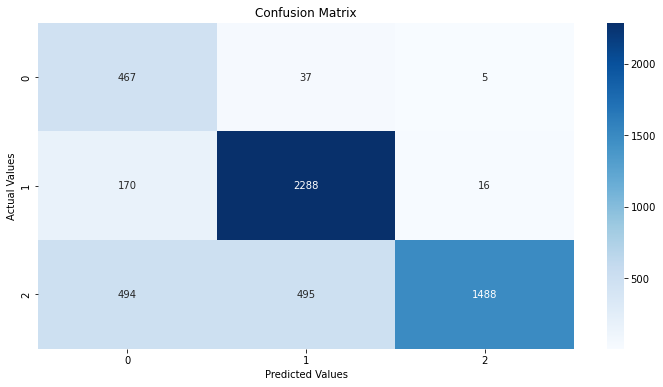

In [22]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import numpy as np
from sklearn.metrics import roc_curve

fpr, tpr, threshold = roc_curve(y_test,y_pred, pos_label=1)
fnr = 1 - tpr
eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]
EER = fnr[np.nanargmin(np.absolute((fnr - fpr)))]
print(eer_threshold)
print("EER = ", EER)

2
EER =  0.9935327405012127
